In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns

BASEDIR="/data1/shahs3/users/sunge/cnv_simulator"
HMMCOPY_DIR=f"{BASEDIR}/hmmcopy"


In [3]:
hmmcopy_df = pd.read_csv(f"{HMMCOPY_DIR}/output/aliquot_hmmcopy/minitest_c2_2_hmmcopy_reads.csv.gz")

print(hmmcopy_df.shape)
hmmcopy_df.head()

(186180, 16)


,start,end,chr,reads,gc,map,cor_gc,copy,valid,ideal,modal_curve,modal_quantile,cor_map,multiplier,state,cell_id
0,1,500000,1,520,0.423964,0.348523,0.743821,2.232995,True,False,699.092925,50.0,NaN,3,3,128624A-R22-C57
1,500001,1000000,1,849,0.501412,0.770391,1.004828,3.016554,True,False,844.920792,50.0,NaN,3,3,128624A-R22-C57
2,1000001,1500000,1,1002,0.598332,0.982072,1.059765,3.181479,True,False,945.492365,50.0,NaN,3,3,128624A-R22-C57
3,1500001,2000000,1,867,0.539498,0.963004,0.968387,2.907155,True,True,895.303619,50.0,NaN,3,3,128624A-R22-C57
4,2000001,2500000,1,1075,0.594508,0.997066,1.139677,3.421378,True,True,943.249973,50.0,NaN,3,3,128624A-R22-C57


In [18]:
def long_to_cell_bin_matrix(df, select_chr, value_col="state"):
    """
    Converts a long-format DataFrame with cell/bin rows into a wide matrix
    with cells as rows and bins as columns.
    
    Parameters:
    - df: pandas DataFrame with columns including 'start', 'end', 'chr', 'cell_id', and value_col
    - value_col: the column to pivot into the matrix values (default = 'reads')
    
    Returns:
    - A DataFrame with cell_id as the index and bins as columns
    """
    # Create a unique bin label for columns
    df = df[df['chr'].isin(select_chr)].copy()
    df['bin_id'] = df['chr'].astype(str) + ":" + df['start'].astype(str) + "-" + df['end'].astype(str)

    # Pivot to matrix format
    matrix = df.pivot(index='cell_id', columns='bin_id', values=value_col)

    # Optional: sort columns by chromosome and position
    matrix.columns.name = None
    matrix = matrix.sort_index(axis=1, key=lambda col: [
        (int(x.split(":")[0]), int(x.split(":")[1].split("-")[0])) for x in col
    ])

    return matrix

In [19]:
state_matrix = long_to_cell_bin_matrix(hmmcopy_df, ["1", "2"], value_col="state")

print(state_matrix.shape)

(30, 986)


In [13]:
state_matrix

,1:1-500000,1:500001-1000000,1:1000001-1500000,1:1500001-2000000,1:2000001-2500000,1:2500001-3000000,1:3000001-3500000,1:3500001-4000000,1:4000001-4500000,1:4500001-5000000,...,2:238500001-239000000,2:239000001-239500000,2:239500001-240000000,2:240000001-240500000,2:240500001-241000000,2:241000001-241500000,2:241500001-242000000,2:242000001-242500000,2:242500001-243000000,2:243000001-243500000
cell_id,,,,,,,,,,,,,,,,,,,,,
110720-R16-C59,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
110720-R24-C54,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
110720-R32-C58,6,6,6,6,6,6,6,6,6,6,...,6,6,6,6,6,6,6,6,6,6
128624A-R22-C57,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
128640A-R56-C46,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
128650A-R47-C60,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
128665A-R42-C56,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
128669A-R31-C18,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
128686A-R26-C52,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [16]:
state_colors = {
    "-2": "#2C78B2",  # Dark blue
    "-1": "#94C4DB",  # Light blue
    "0": "#C5C5C5",  # Gray
    "1": "#FCC484",  # Light orange
    "2": "#FA8154",  # Orange
    "3": "#DD4031",  # Red-orange
    "4": "#A9000D",  # Dark red
    "5": "#8C033A",  # Burgundy
    "6": "#6A1B9A",  # Medium purple
    "7": "#4A148C",  # Dark purple
    "8": "#38006B",  # Very dark purple
    "9": "#2E0057",  # Deep purple
    "10": "#240043",  # Almost black purple
    "11": "#1A002F",  # Darkest purple
    "12": "#12001C",  # Near-black purple
}

def plot_state_heatmap(matrix, state_colors, title="HMM Copy States"):
    """
    Plots a heatmap using a custom colormap for HMM states.
    
    Parameters:
    - matrix: DataFrame with cells as rows, bins as columns
    - state_colors: dict mapping state (as str or int) to color hex codes
    - title: Title of the plot
    """
    # Ensure matrix has integer states, not strings
    matrix = matrix.astype(int)

    # Sort colors by integer state value
    sorted_states = sorted(int(k) for k in state_colors.keys())
    color_list = [state_colors[str(k)] for k in sorted_states]

    # Create colormap and normalization
    cmap = mcolors.ListedColormap(color_list)
    norm = mcolors.BoundaryNorm(boundaries=[s - 0.5 for s in sorted_states] + [sorted_states[-1] + 0.5], ncolors=len(color_list))

    # Plot
    plt.figure(figsize=(12, 8))
    cluster_plt = sns.clustermap(
        matrix,
        cmap = cmap,
        cbar_pos = (1.03, 0.6, 0.03, 0.2),
        cbar_kws = {"label": "HMM State"},
        row_cluster = False,
        col_cluster = False,
        # dendrogram_ratio = (0.01, 0.01),
        xticklabels = False,
        yticklabels = False
    )
    cluster_plt.ax_heatmap.set_ylabel("Cells")
    cluster_plt.ax_heatmap.set_xlabel("Bins")
    # cluster_plt.ax_heatmap.set_xticks(chr_start_pos)
    # cluster_plt.ax_heatmap.set_xticklabels(chr_lst)

    # sns.heatmap(matrix, cmap=cmap, norm=norm, cbar_kws={'label': 'HMM State'}, linewidths=0.1)
    # plt.title(title)
    # plt.xlabel("Genomic Bins")
    # plt.ylabel("Cells")
    # plt.tight_layout()
    # plt.show()
    plt.show()

<Figure size 1200x800 with 0 Axes>

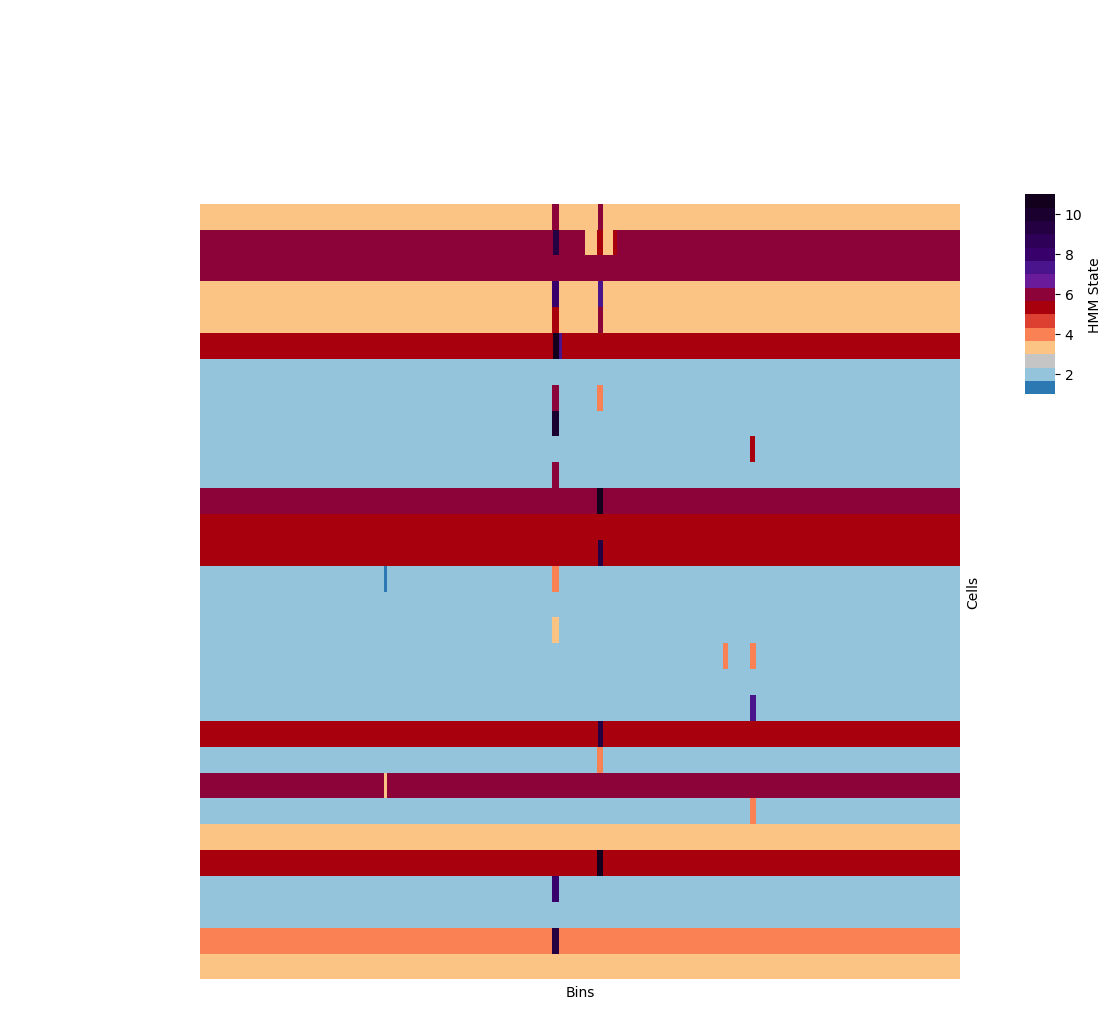

In [17]:
plot_state_heatmap(state_matrix, state_colors, title="HMM Copy States Heatmap for Chromosomes 1 and 2")

# # Sort colors by integer state value
# sorted_states = sorted(int(k) for k in state_colors.keys())
# color_list = [state_colors[str(k)] for k in sorted_states]

# # Create colormap and normalization
# cmap = mcolors.ListedColormap(color_list)
# norm = mcolors.BoundaryNorm(boundaries=[s - 0.5 for s in sorted_states] + [sorted_states[-1] + 0.5], ncolors=len(color_list))

# # Plot
# plt.figure(figsize=(12, 8))
# sns.heatmap(state_matrix, cmap=cmap, norm=norm, cbar_kws={'label': 'HMM State'}, linewidths=0.1)
# # plt.title(title)
# plt.xlabel("Genomic Bins")
# plt.ylabel("Cells")
# plt.tight_layout()
# plt.show()